# INTRODUCTION

Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.
Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide a short description of your data set (less than 200 characters).

- Raw data sets
- python code to build the final data set
- Basic operations to build predictive modelling tasks using this data set

In [11]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
# Loading the downloaded data set into jupyter notebook 
dataset = pd.read_csv(r'C:\Users\91935\Desktop\ML_Project_USAR\ElectionData.csv') 


In [13]:
#Exploring the data set

# Display the first few rows of the dataset
print(dataset.head())  

   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66  

In [14]:
# Get information about the datase
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [15]:
# Get summary statistics of the dataset
print(dataset.describe())

        TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.0

In [16]:
#Data Preprocessing
dataset.dropna(inplace=True) # Remove rows with missing values, if applicable

In [23]:
# Scaling the Data
X = dataset[['TimeElapsed', 'totalMandates', 'Percentage','Votes']]

In [18]:
y = dataset['FinalMandates'] 

In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [31]:
# Feature Selection
model = LinearRegression() 
model.fit(X_train, y_train) 

LinearRegression()

In [21]:
# Evaluating the model
y_pred = model.predict(X_test)  # making predictions on test data 
mse = mean_squared_error(y_test, y_pred)  #calculating mean square error
mae = mean_absolute_error(y_test, y_pred)  #calculating mean absolute error
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 12.48117183432706
Mean Absolute Error: 0.865690836664673


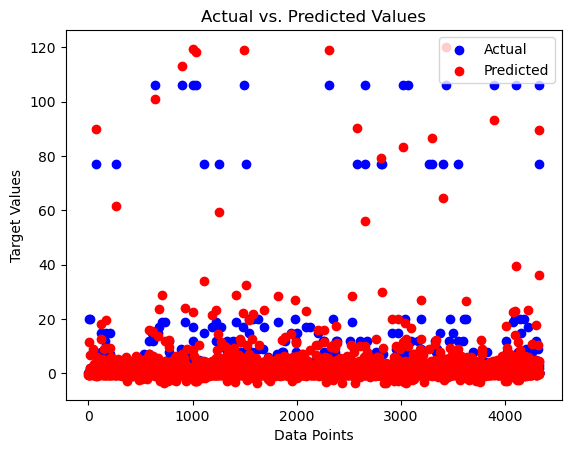

In [22]:
# Visulatization
import matplotlib.pyplot as plt
# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual')
# Plotting the predicted values
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted')
# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs. Predicted Values')
# Adding legend
plt.legend()

# Display the plot
plt.show()


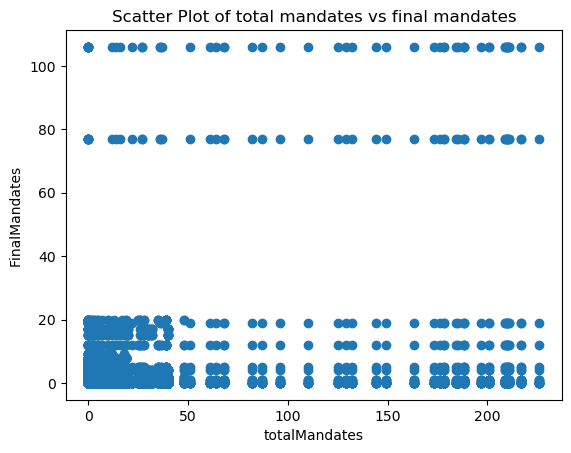

In [26]:

# Visualize a scatter plot of total mandates against the final mandates variable
plt.scatter(dataset['totalMandates'], dataset['FinalMandates'])
plt.xlabel('totalMandates')
plt.ylabel('FinalMandates ')
plt.title('Scatter Plot of total mandates vs final mandates')
plt.show()

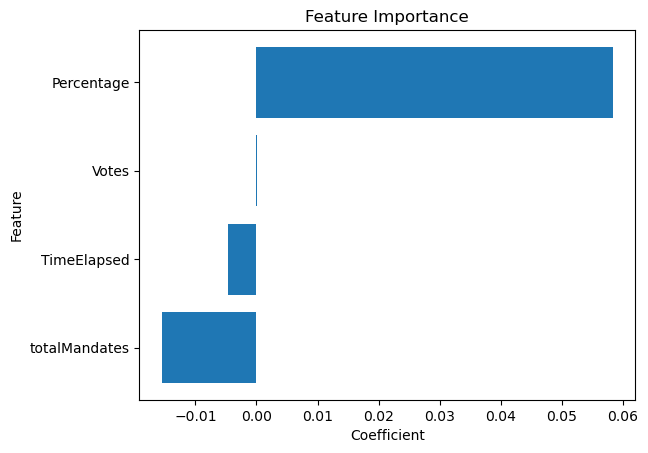

In [27]:
# Fit the model and get the coefficients
model.fit(X_train, y_train)
feature_importance = pd.Series(model.coef_, index=X_train.columns)

# Sort the feature importance values
feature_importance = feature_importance.sort_values()

# Visualize the feature importance
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

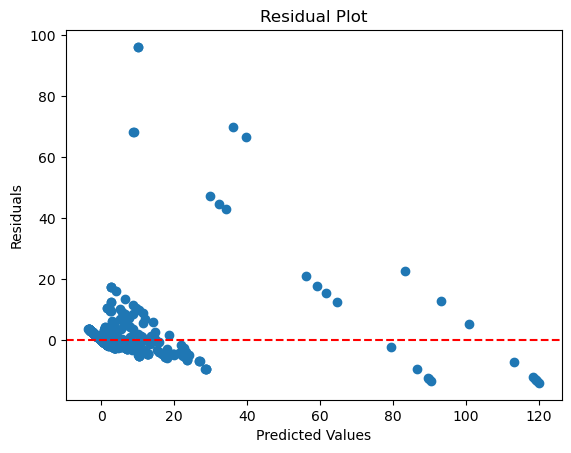

In [28]:
# Calculate the residuals
residuals = y_test - y_pred

# Visualize the residuals using a scatter plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()